1. Source: https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset

2. A list of data collected by the mayo clinic that relates to cirrhosis of the liver.

3. stage

4. A person

5. Classification

6. 19

7. 418

8. None

1. ID: unique identifier
2. N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986
3. Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
4. Drug: type of drug D-penicillamine or placebo
5. Age: age in [days]
6. Sex: M (male) or F (female)
7. Ascites: presence of ascites N (No) or Y (Yes)
8. Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
9. Spiders: presence of spiders N (No) or Y (Yes)
10. Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
11. Bilirubin: serum bilirubin in [mg/dl]
12. Cholesterol: serum cholesterol in [mg/dl]
13. Albumin: albumin in [gm/dl]
14. Copper: urine copper in [ug/day]
15. Alk_Phos: alkaline phosphatase in [U/liter]
16. SGOT: SGOT in [U/ml]
17. Triglycerides: triglicerides in [mg/dl]
18. Platelets: platelets per cubic [ml/1000]
19. Prothrombin: prothrombin time in seconds [s]
20. Stage: histologic stage of disease (1, 2, 3, or 4)


In [1]:
#Imports
import os
os.environ["OMP_NUM_THREADS"] = '1'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (precision_score,recall_score,mean_absolute_error,
                             mean_squared_error,explained_variance_score,
                             max_error,classification_report,ConfusionMatrixDisplay,
                             RocCurveDisplay,r2_score)
from sklearn.preprocessing import (StandardScaler,OrdinalEncoder,OneHotEncoder)
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer,ColumnTransformer,make_column_selector
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:/Users/Mikey/Documents/GitHub/dojo-env-setup/Project-2/imports/cirrhosis.csv')

In [3]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [5]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [6]:
df.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

#Data Cleaing

In [7]:
df.reset_index()

,index,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,...,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,...,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,...,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,2,3,1012,D,D-penicillamine,25594,M,N,N,N,...,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,...,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,4,5,1504,CL,Placebo,13918,F,N,Y,Y,...,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,413,414,681,D,NaN,24472,F,NaN,NaN,NaN,...,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,...,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,...,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,416,417,691,C,NaN,21185,F,NaN,NaN,NaN,...,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [8]:
#Columns to lower case for ease of use.
df.columns=df.columns.str.lower()

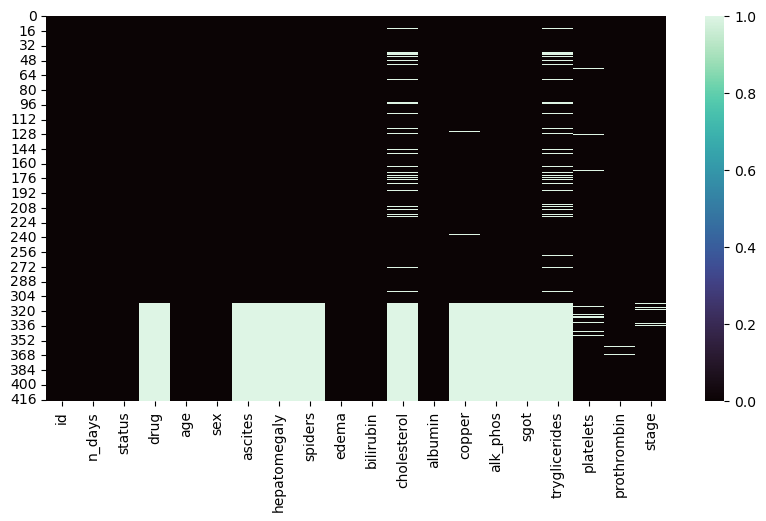

In [9]:
#Visual for missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(),cmap='mako');

In [10]:
#Percentages of missing values.
percent_missing=df.isna().sum()*100/len(df)
print(percent_missing)

id                0.000000
n_days            0.000000
status            0.000000
drug             25.358852
age               0.000000
sex               0.000000
ascites          25.358852
hepatomegaly     25.358852
spiders          25.358852
edema             0.000000
bilirubin         0.000000
cholesterol      32.057416
albumin           0.000000
copper           25.837321
alk_phos         25.358852
sgot             25.358852
tryglicerides    32.535885
platelets         2.631579
prothrombin       0.478469
stage             1.435407
dtype: float64


In [11]:
#Copies for Exploratory data analysis and machine learning
eda_df=df.copy(deep=True)
ml_df=df.copy(deep=True)

In [12]:
eda_df.drop(columns=['id'],inplace=True)
ml_df.drop(columns=['id'],inplace=True)

In [13]:
#Divide age by 365 to convert to years.
eda_df['age']=(eda_df['age']/365)
ml_df['age']=(ml_df['age']/365)

In [14]:
#Float64 to int64
eda_df['age']=eda_df['age'].astype('int64')
ml_df['age']=ml_df['age'].astype('int64')

In [15]:
#Filters for cleaning up missing values.
cat_col=eda_df.select_dtypes(['object']).columns
num_col=eda_df.select_dtypes(['float64','int64']).columns

In [16]:
cat_col2=ml_df.select_dtypes(['object']).columns
num_col2=ml_df.select_dtypes(['float64','int64']).columns

In [17]:
#Dropping the six missing values from 'stage'
ml_df.dropna(subset=['stage'], inplace=True)
eda_df.dropna(subset=['stage'], inplace=True)

In [18]:
for n in num_col:
    eda_df[n].fillna(eda_df[n].median(),inplace=True)
    
for m in cat_col:
    eda_df[m].fillna(eda_df[m].mode().values[0],inplace=True)
    
print(eda_df.isna().sum())

n_days           0
status           0
drug             0
age              0
sex              0
ascites          0
hepatomegaly     0
spiders          0
edema            0
bilirubin        0
cholesterol      0
albumin          0
copper           0
alk_phos         0
sgot             0
tryglicerides    0
platelets        0
prothrombin      0
stage            0
dtype: int64


In [19]:
for n in num_col2:
    ml_df[n].fillna(ml_df[n].median(),inplace=True)
    
for m in cat_col2:
    ml_df[m].fillna(ml_df[m].mode().values[0],inplace=True)

print(ml_df.isna().sum())

n_days           0
status           0
drug             0
age              0
sex              0
ascites          0
hepatomegaly     0
spiders          0
edema            0
bilirubin        0
cholesterol      0
albumin          0
copper           0
alk_phos         0
sgot             0
tryglicerides    0
platelets        0
prothrombin      0
stage            0
dtype: int64


#Exploritory data analysis visualizations

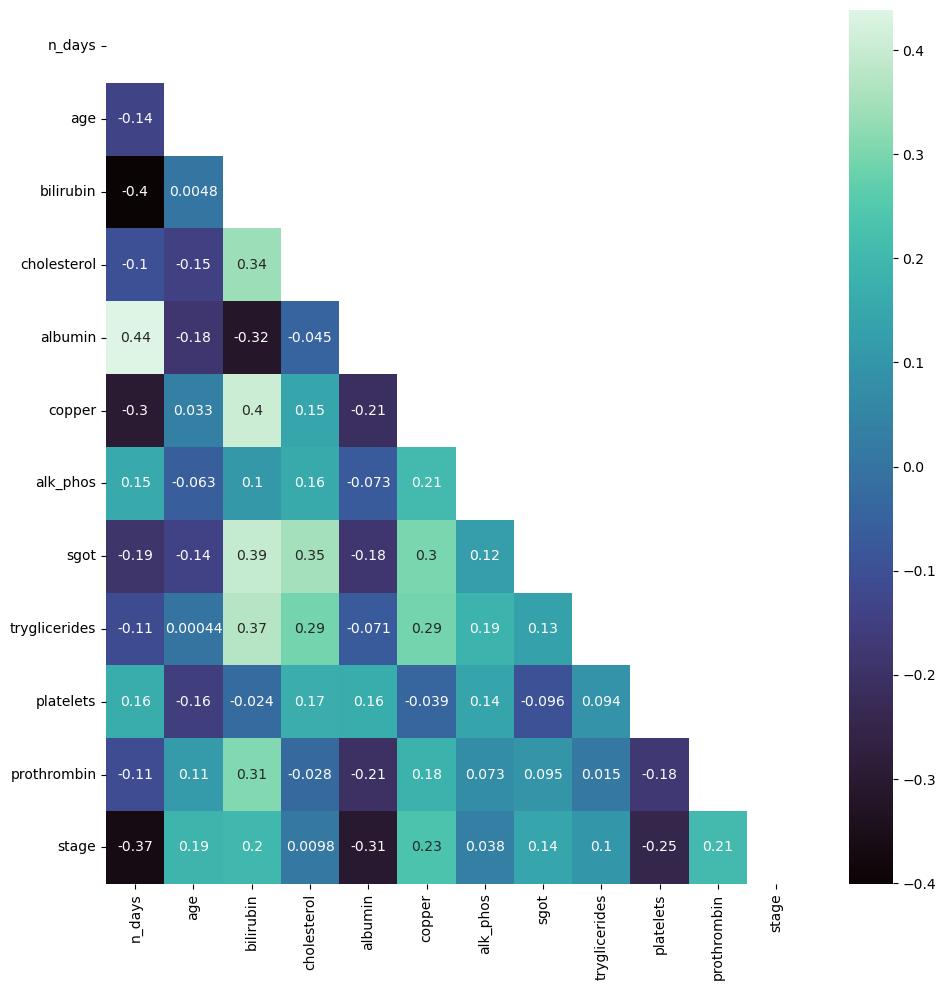

In [20]:
#Heat Map
corr=eda_df.corr()
mask=np.triu(np.ones_like(corr))
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='mako',mask=mask)
plt.tight_layout();

# Insights from heatmap we can see a few different things
## Positive Correlations
* n_days and albumin
* bilirubin correlates to prothrombin, triglycerides, sgot,copper, cholesterol
* cholesterol and sgot
* copper and sgot

## Negative Correlations
* n_days has a negative correlation with stage, copper, and bilirubin
* bilirubin and albumin
* albumin and stage

### These insights could help us make some final predictions.

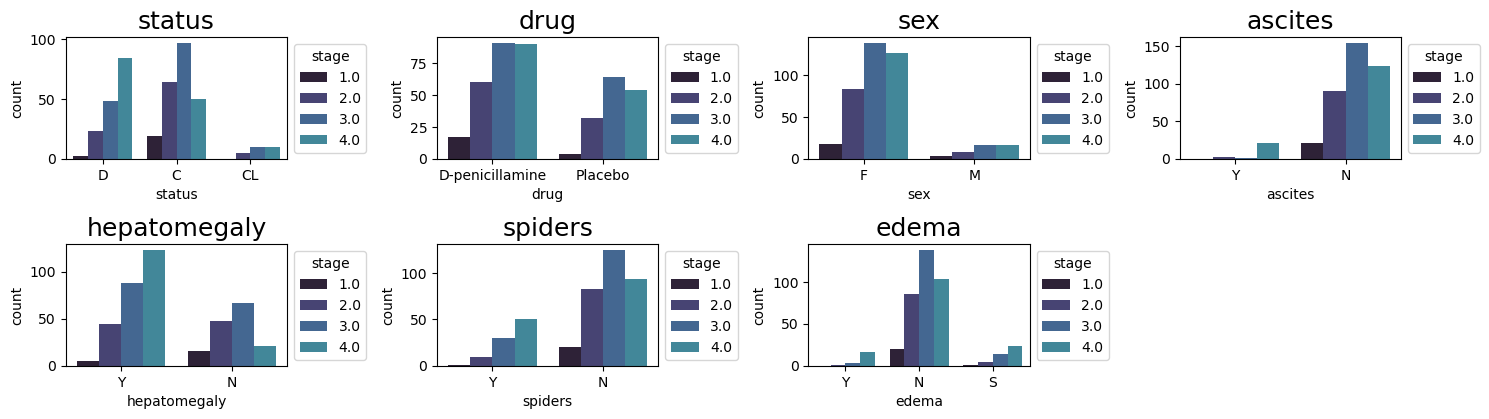

In [21]:
title2=cat_col[:].tolist()
plt.figure(figsize=(15,8))
for i, variable in enumerate(cat_col[:]):
    plt.subplot(4,4,i+1)
    sns.set_palette('mako')
    sns.countplot(x=eda_df[variable],hue='stage',data=eda_df)
    plt.tight_layout()
    plt.title(title2[i],size=18)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1),title='stage')

#Identify Outliers

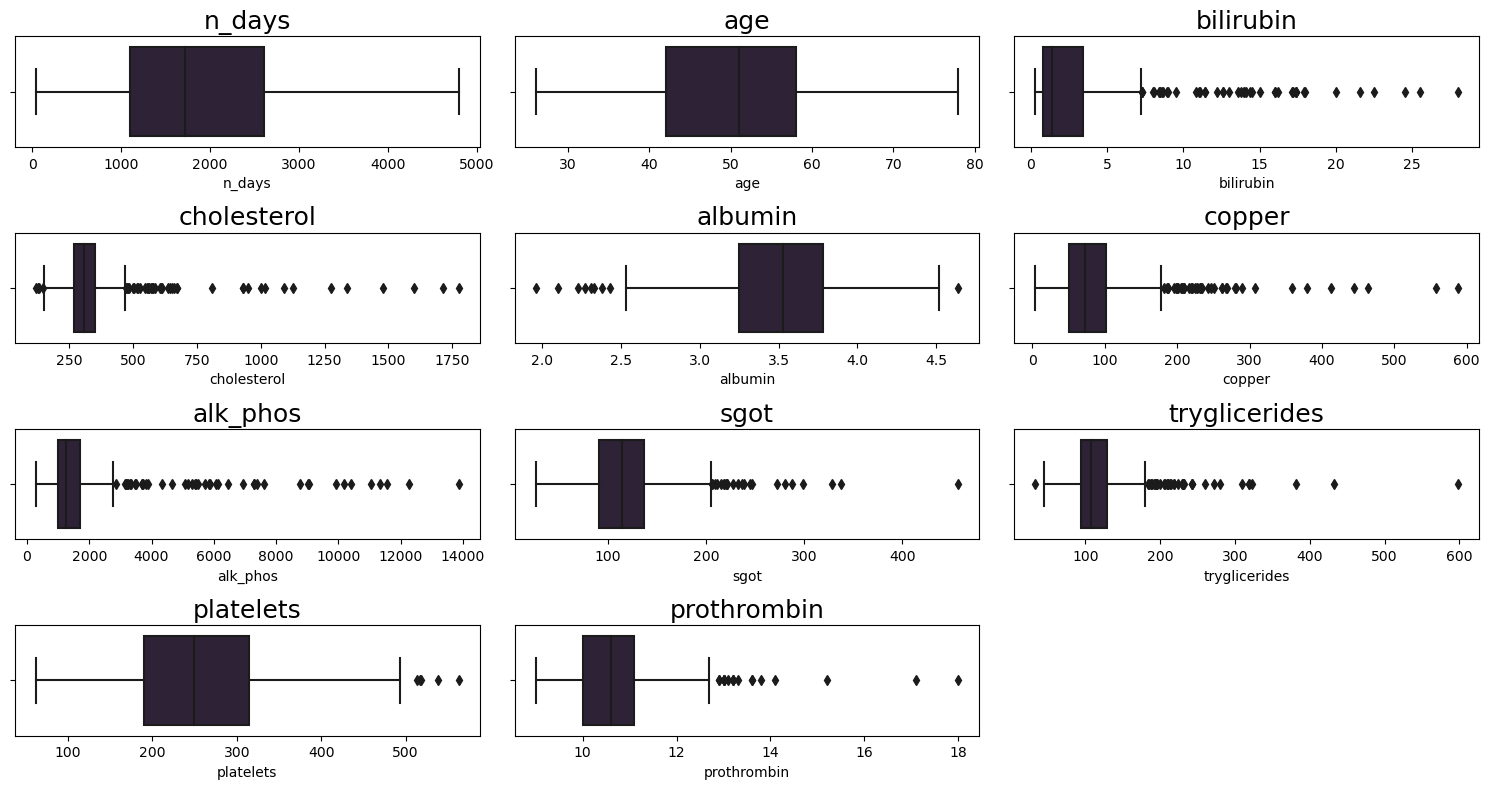

In [22]:
title=num_col[:-1].tolist()
plt.figure(figsize=(15,8))
for i, variable in enumerate(num_col[:-1]):
    plt.subplot(4,3,i+1)
    sns.set_palette('mako')
    sns.boxplot(x=eda_df[variable],data=eda_df,orient="v")
    plt.tight_layout()
    plt.title(title[i],size = 18)

#Outliers May Include

*   Bilirubin
*   Cholesterol
*   Albumin
*   Copper
*   Alk_phos
*   Sgot
*   Tryglicerides
*   Platelets
*   Prothrombin



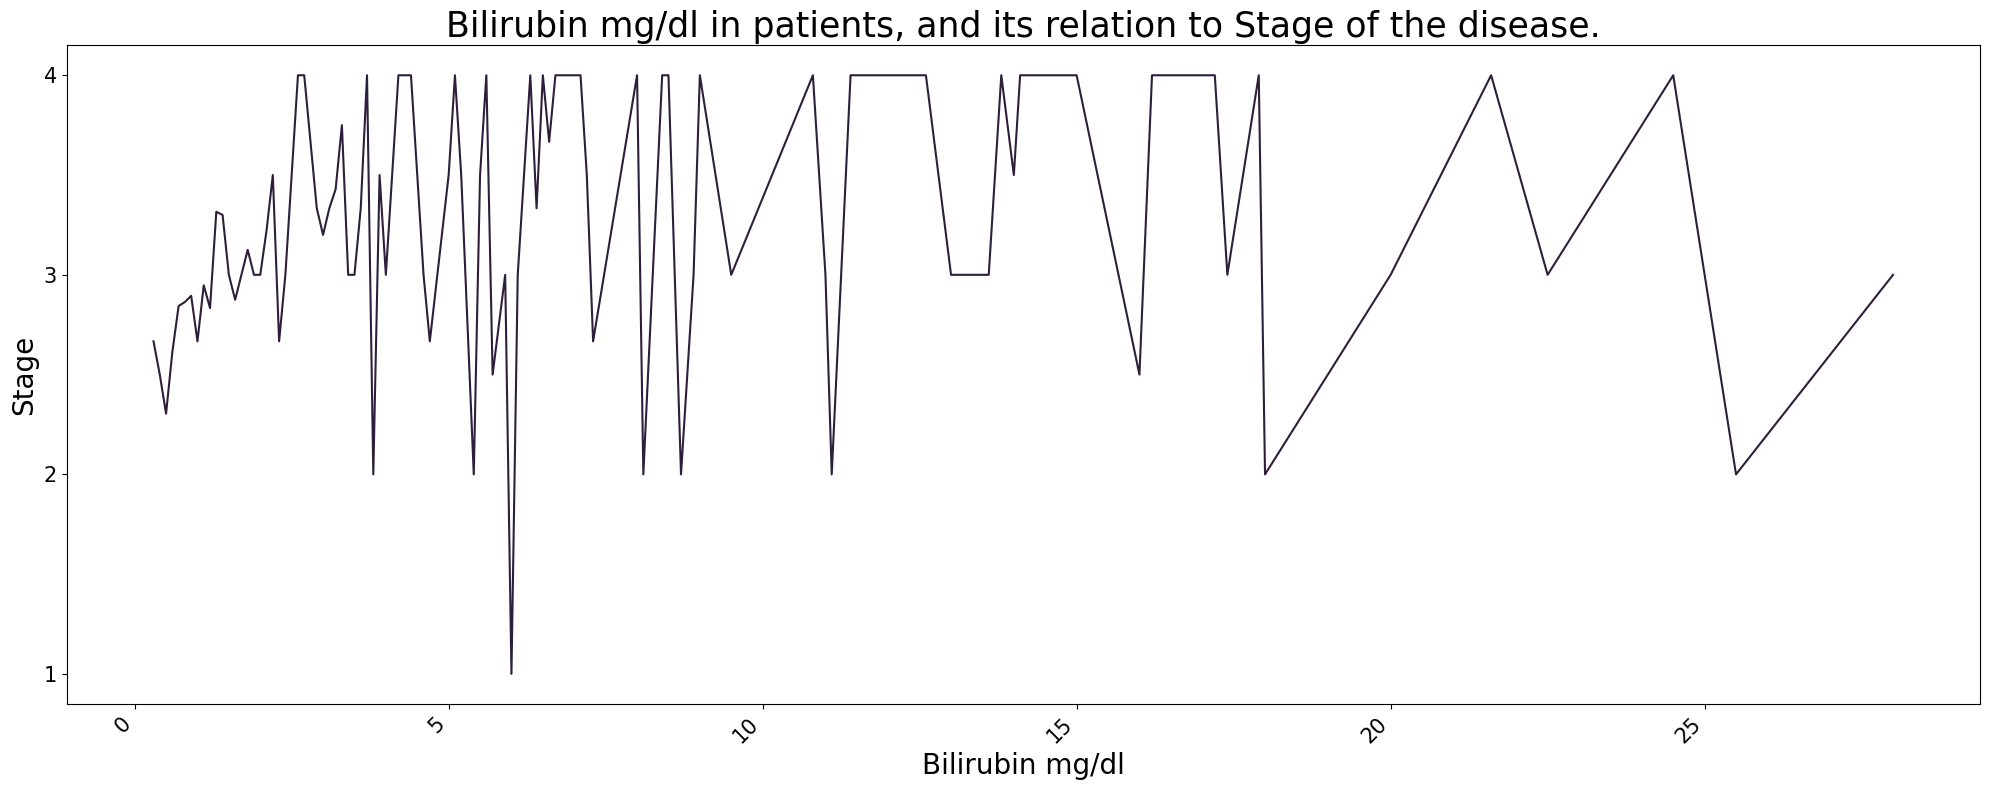

In [23]:
plt.figure(figsize=(20,8))
ax=sns.lineplot(data=eda_df,x='bilirubin',y='stage',ci=None)
ax.set_title('Bilirubin mg/dl in patients, and its relation to Stage of the disease.',fontsize=25)
ax.set_xlabel('Bilirubin mg/dl',fontsize=20)
ax.set_ylabel('Stage',fontsize=20)
ax.set_yticks((1,2,3,4))
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right',fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=15)
plt.tight_layout();

### This line plot shows us that when Bilirubin is above 7~mg/dl patients are at stage 2 or above of the disease 

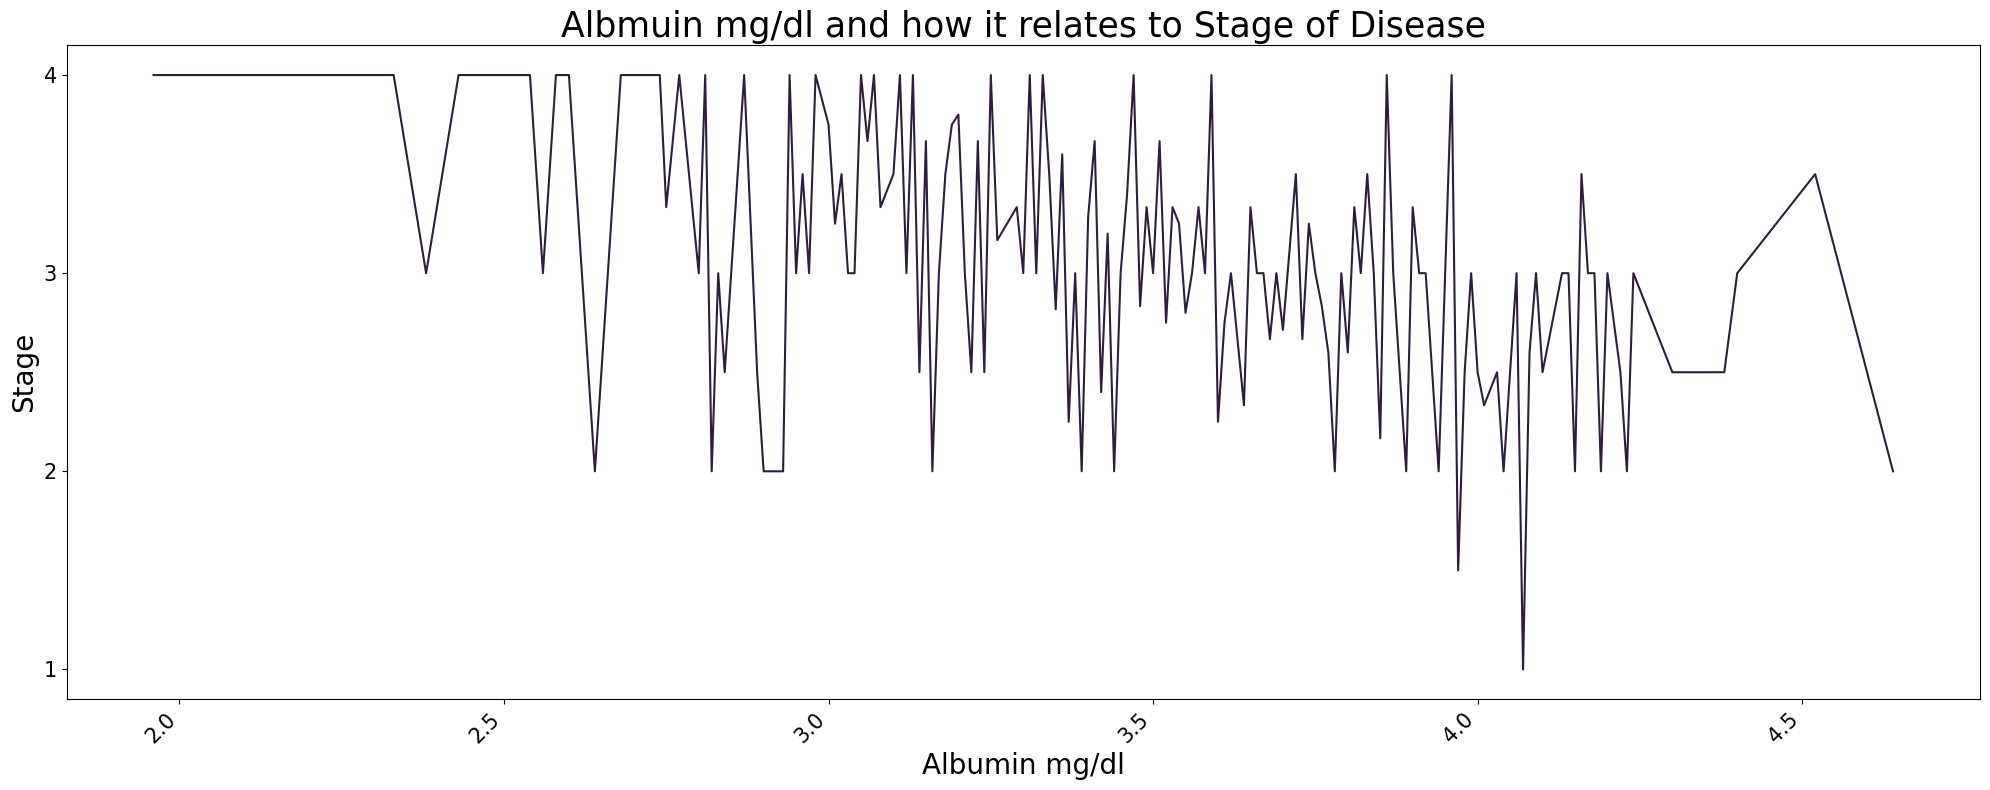

In [24]:
plt.figure(figsize=(20,8))
ax=sns.lineplot(data=eda_df,x='albumin',y='stage',ci=None)
ax.set_title('Albmuin mg/dl and how it relates to Stage of Disease',fontsize=25)
ax.set_xlabel('Albumin mg/dl',fontsize=20)
ax.set_ylabel('Stage',fontsize=20)
ax.set_yticks((1,2,3,4))
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right',fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=15)
plt.tight_layout();

### In this lineplot we can see that after 2.5 mg/dl or lower is found in the blood of Albumin we see many if not all patients at stage 3-4 of the disease.

# Models

In [25]:
#Create a method to evalute with.
def eval_regression(y_true, y_pred, name='model'):
  mae=mean_absolute_error(y_true,y_pred)
  mse=mean_squared_error(y_true,y_pred)
  rmse=np.sqrt(mse)
  r2=r2_score(y_true,y_pred)

  print(f'{name} Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

In [26]:
X=ml_df.drop(columns=['stage','status','n_days'])
y=ml_df['stage']

In [27]:
#Scaler
scaler=StandardScaler()
ohe=OneHotEncoder()
#Selector
num_selector=make_column_selector(dtype_include='number')
cat_selector=make_column_selector(dtype_include='object')
#NumPipe
num_pipe=make_pipeline(scaler)

In [28]:
#Preprocessor pipeline
preprocessor=make_column_transformer((num_pipe, num_selector),(ohe, cat_selector))

In [29]:
#PCA transformer
pca=PCA(n_components=2)
# Preprocess the entire dataset
X_preprocessed=preprocessor.fit_transform(X)
# Split preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.8, random_state=42)

# K-Nearest Neighbors Regressor

In [30]:
knn=KNeighborsRegressor()

In [31]:
knn.fit(X_train, y_train)
knn_test=knn.predict(X_test)
knn_train=knn.predict(X_train)
eval_regression(y_test,knn_test,name='K-Nearest Neighbors w/o PCA Test Scores')
eval_regression(y_train,knn_train,name='K-Nearest Neighbors w/o PCA Train Scores')

K-Nearest Neighbors w/o PCA Test Scores Scores
MAE: 0.6927 
MSE: 0.7061 
RMSE: 0.8403 
R2: 0.0717

K-Nearest Neighbors w/o PCA Train Scores Scores
MAE: 0.6122 
MSE: 0.5556 
RMSE: 0.7454 
R2: 0.3301



In [32]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [33]:
params={'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
        'weights':['uniform','distance'],
        'metric':['minkowski','euclidean','manhattan']}

In [34]:
#GridSearch
gridsearcherknn=GridSearchCV(knn,params)

In [35]:
#Gridsearch Fit
gridsearcherknn.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'weights': ['uniform', 'distance']})

In [36]:
#Print best parameters and save them.
print(gridsearcherknn.best_params_)
gridbest_paramsknn=gridsearcherknn.best_estimator_

{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}


In [37]:
#Fit
gridbest_paramsknn.fit(X_train,y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=13)

In [38]:
#Predict on best parameters
bestknn=gridbest_paramsknn.predict(X_test)
bestknn_train=gridbest_paramsknn.predict(X_train)

In [39]:
eval_regression(y_test,bestknn,name='K-Nearest Neighbors w/o PCA Test Scores')
eval_regression(y_train,bestknn_train,name='K-Nearest Neighbors w/o PCA Train Scores')

K-Nearest Neighbors w/o PCA Test Scores Scores
MAE: 0.6627 
MSE: 0.6275 
RMSE: 0.7921 
R2: 0.1751

K-Nearest Neighbors w/o PCA Train Scores Scores
MAE: 0.6360 
MSE: 0.6074 
RMSE: 0.7794 
R2: 0.2676



# K-Nearest Neighbors w/ PCA

In [40]:
#KNN with PCA
knn_with_pca=make_pipeline(pca,knn)

In [41]:
knn_with_pca.fit(X_train, y_train)
knn_pca_test=knn_with_pca.predict(X_test)
knn_pca_train=knn_with_pca.predict(X_train)
eval_regression(y_test,knn_pca_test,name='K-Nearest Neighbors w/ PCA Test Scores')
eval_regression(y_train,knn_pca_train,name='K-Nearest Neighbors w/ PCA Train Scores')

K-Nearest Neighbors w/ PCA Test Scores Scores
MAE: 0.6582 
MSE: 0.6701 
RMSE: 0.8186 
R2: 0.1190

K-Nearest Neighbors w/ PCA Train Scores Scores
MAE: 0.6195 
MSE: 0.6088 
RMSE: 0.7802 
R2: 0.2660



In [42]:
knn_with_pca.get_params()

{'memory': None,
 'steps': [('pca', PCA(n_components=2)),
  ('kneighborsregressor', KNeighborsRegressor())],
 'verbose': False,
 'pca': PCA(n_components=2),
 'kneighborsregressor': KNeighborsRegressor(),
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 2,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'kneighborsregressor__algorithm': 'auto',
 'kneighborsregressor__leaf_size': 30,
 'kneighborsregressor__metric': 'minkowski',
 'kneighborsregressor__metric_params': None,
 'kneighborsregressor__n_jobs': None,
 'kneighborsregressor__n_neighbors': 5,
 'kneighborsregressor__p': 2,
 'kneighborsregressor__weights': 'uniform'}

In [43]:
params={'kneighborsregressor__n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
        'kneighborsregressor__weights':['uniform','distance'],
        'kneighborsregressor__metric':['minkowski','euclidean','manhattan'],
        'pca__n_components': [2, 4]}

In [44]:
#GridSearch
gridsearcherknn_with_pca=GridSearchCV(estimator=knn_with_pca,param_grid=params)

In [45]:
#Gridsearch Fit
gridsearcherknn_with_pca=GridSearchCV(estimator=knn_with_pca,param_grid=params)
gridsearcherknn_with_pca.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA(n_components=2)),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             param_grid={'kneighborsregressor__metric': ['minkowski',
                                                         'euclidean',
                                                         'manhattan'],
                         'kneighborsregressor__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15],
                         'kneighborsregressor__weights': ['uniform',
                                                          'distance'],
                         'pca__n_components': [2, 4]})

In [46]:
#Print best parameters and save them.
print(gridsearcherknn_with_pca.best_params_)
gridbest_paramsknn_with_pca=gridsearcherknn_with_pca.best_estimator_

{'kneighborsregressor__metric': 'minkowski', 'kneighborsregressor__n_neighbors': 10, 'kneighborsregressor__weights': 'uniform', 'pca__n_components': 4}


In [47]:
#Fit
gridbest_paramsknn_with_pca.fit(X_train,y_train)

Pipeline(steps=[('pca', PCA(n_components=4)),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=10))])

In [48]:
#Predict on best parameters
bestknn=gridbest_paramsknn_with_pca.predict(X_test)
bestknn_train=gridbest_paramsknn_with_pca.predict(X_train)

In [49]:
eval_regression(y_test,bestknn,name='K-Nearest Neighbors w/ PCA Test Scores')
eval_regression(y_train,bestknn_train,name='K-Nearest Neighbors w/ PCA Train Scores')

K-Nearest Neighbors w/ PCA Test Scores Scores
MAE: 0.6567 
MSE: 0.6534 
RMSE: 0.8083 
R2: 0.1410

K-Nearest Neighbors w/ PCA Train Scores Scores
MAE: 0.6207 
MSE: 0.5757 
RMSE: 0.7588 
R2: 0.3059



# Random Forest Regressor

In [50]:
rfr=RandomForestRegressor()

In [51]:
rfr.fit(X_train,y_train)
rfr_test=rfr.predict(X_test)
rfr_train=rfr.predict(X_train)
eval_regression(y_test,rfr_test,name='Random Forest Regression w/o PCA Test Scores')
eval_regression(y_train,rfr_train,name='Random Forest Regression w/o PCA Train Scores')

Random Forest Regression w/o PCA Test Scores Scores
MAE: 0.6421 
MSE: 0.6407 
RMSE: 0.8005 
R2: 0.1576

Random Forest Regression w/o PCA Train Scores Scores
MAE: 0.2730 
MSE: 0.1121 
RMSE: 0.3349 
R2: 0.8648



In [52]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [53]:
params={'max_depth':[20,30,40,50],
        'max_features':['log2','auto'],
        'n_estimators':[25,50,150,200]}

In [54]:
#GridSearch
gridsearcher_rfr=GridSearchCV(rfr,params)

In [55]:
#Gridsearch Fit
gridsearcher_rfr.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20, 30, 40, 50],
                         'max_features': ['log2', 'auto'],
                         'n_estimators': [25, 50, 150, 200]})

In [56]:
#Print best parameters and save them.
print(gridsearcher_rfr.best_params_)
gridbest_params_rfr=gridsearcher_rfr.best_estimator_

{'max_depth': 30, 'max_features': 'log2', 'n_estimators': 150}


In [57]:
#Fit
gridbest_params_rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=30, max_features='log2', n_estimators=150)

In [58]:
#Predict on best parameters
best_rfr=gridbest_params_rfr.predict(X_test)
best_rfr_train=gridbest_params_rfr.predict(X_train)

In [59]:
eval_regression(y_test,best_rfr,name='Random Forest Regression w/o PCA Test Scores')
eval_regression(y_train,best_rfr_train,name='Random Forest Regression w/o PCA Train Scores')

Random Forest Regression w/o PCA Test Scores Scores
MAE: 0.6374 
MSE: 0.6195 
RMSE: 0.7871 
R2: 0.1855

Random Forest Regression w/o PCA Train Scores Scores
MAE: 0.2585 
MSE: 0.1030 
RMSE: 0.3210 
R2: 0.8758



# Random Forest Regressor with PCA

In [60]:
rfr_pca=make_pipeline(pca,rfr)

In [61]:
rfr_pca.fit(X_train,y_train)

Pipeline(steps=[('pca', PCA(n_components=2)),
                ('randomforestregressor', RandomForestRegressor())])

In [62]:
pca_test=gridbest_params_rfr.predict(X_test)
pca_train=gridbest_params_rfr.predict(X_train)
eval_regression(y_test,pca_test,name='Random Forest Regression w/ PCA Test Scores')
eval_regression(y_train,pca_train,name='Random Forest Regression w/ PCA Train Scores')

Random Forest Regression w/ PCA Test Scores Scores
MAE: 0.6374 
MSE: 0.6195 
RMSE: 0.7871 
R2: 0.1855

Random Forest Regression w/ PCA Train Scores Scores
MAE: 0.2585 
MSE: 0.1030 
RMSE: 0.3210 
R2: 0.8758



In [63]:
rfr_pca.get_params()

{'memory': None,
 'steps': [('pca', PCA(n_components=2)),
  ('randomforestregressor', RandomForestRegressor())],
 'verbose': False,
 'pca': PCA(n_components=2),
 'randomforestregressor': RandomForestRegressor(),
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 2,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 1.0,
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestreg

In [64]:
params={'randomforestregressor__max_depth':[20,30,40,50],
        'randomforestregressor__max_features':['log2','auto'],
        'randomforestregressor__n_estimators':[25,50,150,200],
        'pca__n_components': [2, 4]}

In [65]:
#GridSearch
gridsearcherrfr_pca=GridSearchCV(estimator=rfr_pca,param_grid=params)

In [66]:
#Gridsearch Fit
gridsearcherrfr_pca.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA(n_components=2)),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'pca__n_components': [2, 4],
                         'randomforestregressor__max_depth': [20, 30, 40, 50],
                         'randomforestregressor__max_features': ['log2',
                                                                 'auto'],
                         'randomforestregressor__n_estimators': [25, 50, 150,
                                                                 200]})

In [67]:
#Print best parameters and save them.
print(gridsearcherrfr_pca.best_params_)
gridbest_paramsrfr_pca=gridsearcherrfr_pca.best_estimator_

{'pca__n_components': 4, 'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': 'log2', 'randomforestregressor__n_estimators': 50}


In [68]:
#Fit
gridbest_paramsrfr_pca.fit(X_train,y_train)

Pipeline(steps=[('pca', PCA(n_components=4)),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=20, max_features='log2',
                                       n_estimators=50))])

In [69]:
#Predict on best parameters
bestrfr_pca=gridbest_paramsrfr_pca.predict(X_test)
bestrfr_pca_train=gridbest_paramsrfr_pca.predict(X_train)

In [70]:
eval_regression(y_test,bestrfr_pca,name='Random Forest Regression w/ PCA Test Scores')
eval_regression(y_train,bestrfr_pca_train,name='Random Forest Regression w/ PCA Train Scores')

Random Forest Regression w/ PCA Test Scores Scores
MAE: 0.6479 
MSE: 0.6584 
RMSE: 0.8114 
R2: 0.1344

Random Forest Regression w/ PCA Train Scores Scores
MAE: 0.2800 
MSE: 0.1283 
RMSE: 0.3581 
R2: 0.8454



### For this I have chosen the K-Nearest Neighbor with PCA as it has the least overfitting I was able to obtain.


***Please note this is not my final submission for this as I am struggling with it.

# Decision Tree Regressor

In [71]:
dt=DecisionTreeRegressor()

In [72]:
dt.fit(X_train,y_train)
dt_test=dt.predict(X_test)
dt_train=dt.predict(X_train)
eval_regression(y_test,dt_test,name='Decision Tree Regression w/o PCA Test Scores')
eval_regression(y_train,dt_train,name='Decision Tree Regression w/o PCA Train Scores')

Decision Tree Regression w/o PCA Test Scores Scores
MAE: 0.8424 
MSE: 1.3273 
RMSE: 1.1521 
R2: -0.7450

Decision Tree Regression w/o PCA Train Scores Scores
MAE: 0.0000 
MSE: 0.0000 
RMSE: 0.0000 
R2: 1.0000



In [73]:
dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [74]:
params = {'max_depth': [3, 5, 10],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'max_features': ['sqrt', 'log2'],
          'max_leaf_nodes': [None, 5, 10],
          'min_impurity_decrease': [0.0, 0.1, 0.2]}

In [75]:
#GridSearch
gridsearcher_dt=GridSearchCV(dt,params)

In [76]:
#Gridsearch Fit
gridsearcher_dt.fit(X_train,y_train);

In [77]:
#Print best parameters and save them.
print(gridsearcher_dt.best_params_)
gridbest_params_dt=gridsearcher_dt.best_estimator_

{'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [78]:
#Fit
gridbest_params_dt.fit(X_train,y_train);

In [79]:
#Predict on best parameters
best_dt=gridbest_params_dt.predict(X_test)
best_dt_train=gridbest_params_dt.predict(X_train)

In [80]:
eval_regression(y_test,best_dt,name='Decision Tree Regression w/o PCA Test Scores')
eval_regression(y_train,best_dt_train,name='Decision Tree Regression w/o PCA Train Scores')

Decision Tree Regression w/o PCA Test Scores Scores
MAE: 0.7706 
MSE: 0.8497 
RMSE: 0.9218 
R2: -0.1172

Decision Tree Regression w/o PCA Train Scores Scores
MAE: 0.6210 
MSE: 0.5362 
RMSE: 0.7323 
R2: 0.3535



# Decision Tree Regression w/ PCA

In [81]:
dt_pca=make_pipeline(pca,dt)

In [82]:
dt_pca.fit(X_train,y_train)
dt_pca_test=dt_pca.predict(X_test)
dt_pca_train=dt_pca.predict(X_train)

In [83]:
eval_regression(y_test,dt_pca_test,name='Decision Tree Regression w/ PCA Test Scores')
eval_regression(y_train,dt_pca_train,name='Decision Tree Regression w/ PCA Train Scores')

Decision Tree Regression w/ PCA Test Scores Scores
MAE: 0.8818 
MSE: 1.4697 
RMSE: 1.2123 
R2: -0.9323

Decision Tree Regression w/ PCA Train Scores Scores
MAE: 0.0000 
MSE: 0.0000 
RMSE: 0.0000 
R2: 1.0000



In [84]:
dt_pca.get_params()

{'memory': None,
 'steps': [('pca', PCA(n_components=2)),
  ('decisiontreeregressor', DecisionTreeRegressor())],
 'verbose': False,
 'pca': PCA(n_components=2),
 'decisiontreeregressor': DecisionTreeRegressor(),
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 2,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'decisiontreeregressor__ccp_alpha': 0.0,
 'decisiontreeregressor__criterion': 'squared_error',
 'decisiontreeregressor__max_depth': None,
 'decisiontreeregressor__max_features': None,
 'decisiontreeregressor__max_leaf_nodes': None,
 'decisiontreeregressor__min_impurity_decrease': 0.0,
 'decisiontreeregressor__min_samples_leaf': 1,
 'decisiontreeregressor__min_samples_split': 2,
 'decisiontreeregressor__min_weight_fraction_leaf': 0.0,
 'decisiontreeregressor__random_state': None,
 'decisiontreeregressor__splitter': 'best'}

In [85]:
params = {'decisiontreeregressor__max_depth': [3, 5, 10],
          'decisiontreeregressor__min_samples_split': [2, 5, 10],
          'decisiontreeregressor__min_samples_leaf': [1, 2, 4],
          'decisiontreeregressor__max_features': ['sqrt', 'log2'],
          'decisiontreeregressor__max_leaf_nodes': [None, 5, 10],
          'decisiontreeregressor__min_impurity_decrease': [0.0, 0.1, 0.2],
          'pca__n_components':[2,5,6,8]}

In [86]:
#GridSearch
gridsearcher_dt_pca=GridSearchCV(dt_pca,params);

In [87]:
#Gridsearch Fit
gridsearcher_dt_pca.fit(X_train,y_train);

In [88]:
#Print best parameters and save them.
print(gridsearcher_dt_pca.best_params_)
gridbest_params_dt_pca=gridsearcher_dt_pca.best_estimator_

{'decisiontreeregressor__max_depth': 3, 'decisiontreeregressor__max_features': 'sqrt', 'decisiontreeregressor__max_leaf_nodes': 10, 'decisiontreeregressor__min_impurity_decrease': 0.1, 'decisiontreeregressor__min_samples_leaf': 1, 'decisiontreeregressor__min_samples_split': 5, 'pca__n_components': 5}


In [89]:
#Fit
gridbest_params_dt_pca.fit(X_train,y_train);

In [90]:
#Predict on best parameters
best_dt_pca=gridbest_params_dt_pca.predict(X_test)
best_dt_train_pca=gridbest_params_dt_pca.predict(X_train)

In [91]:
eval_regression(y_test,best_dt_pca,name='Decision Tree Regression w/ PCA Test Scores')
eval_regression(y_train,best_dt_train_pca,name='Decision Tree Regression w/ PCA Train Scores')

Decision Tree Regression w/ PCA Test Scores Scores
MAE: 0.7197 
MSE: 0.7006 
RMSE: 0.8370 
R2: 0.0788

Decision Tree Regression w/ PCA Train Scores Scores
MAE: 0.6979 
MSE: 0.6586 
RMSE: 0.8115 
R2: 0.2060



# Linear Regression

In [92]:
dt=DecisionTreeRegressor()

In [93]:
dt.fit(X_train,y_train)
dt_test=dt.predict(X_test)
dt_train=dt.predict(X_train)
eval_regression(y_test,dt_test,name='Decision Tree Regression w/o PCA Test Scores')
eval_regression(y_train,dt_train,name='Decision Tree Regression w/o PCA Train Scores')

Decision Tree Regression w/o PCA Test Scores Scores
MAE: 0.7879 
MSE: 1.2364 
RMSE: 1.1119 
R2: -0.6255

Decision Tree Regression w/o PCA Train Scores Scores
MAE: 0.0000 
MSE: 0.0000 
RMSE: 0.0000 
R2: 1.0000



In [94]:
dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [95]:
params = {'max_depth': [3, 5, 10],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'max_features': ['sqrt', 'log2'],
          'max_leaf_nodes': [None, 5, 10],
          'min_impurity_decrease': [0.0, 0.1, 0.2]}

In [96]:
#GridSearch
gridsearcher_dt=GridSearchCV(dt,params)

In [97]:
#Gridsearch Fit
gridsearcher_dt.fit(X_train,y_train);

In [98]:
#Print best parameters and save them.
print(gridsearcher_dt.best_params_)
gridbest_params_dt=gridsearcher_dt.best_estimator_

{'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [99]:
#Fit
gridbest_params_dt.fit(X_train,y_train);

In [100]:
#Predict on best parameters
best_dt=gridbest_params_dt.predict(X_test)
best_dt_train=gridbest_params_dt.predict(X_train)

In [101]:
eval_regression(y_test,best_dt,name='Decision Tree Regression w/o PCA Test Scores')
eval_regression(y_train,best_dt_train,name='Decision Tree Regression w/o PCA Train Scores')

Decision Tree Regression w/o PCA Test Scores Scores
MAE: 0.7296 
MSE: 0.8044 
RMSE: 0.8969 
R2: -0.0576

Decision Tree Regression w/o PCA Train Scores Scores
MAE: 0.6362 
MSE: 0.5895 
RMSE: 0.7678 
R2: 0.2892



# Linear Regression

In [102]:
lr=LinearRegression()

In [103]:
lr.fit(X_train,y_train)
lr_test=lr.predict(X_test)
lr_train=lr.predict(X_train)

In [104]:
eval_regression(y_test,lr_test,name='Linear Regression w/ PCA Test Scores')
eval_regression(y_train,lr_train,name='Linear Regression w/ PCA Train Scores')

Linear Regression w/ PCA Test Scores Scores
MAE: 0.7128 
MSE: 0.7914 
RMSE: 0.8896 
R2: -0.0405

Linear Regression w/ PCA Train Scores Scores
MAE: 0.5350 
MSE: 0.4554 
RMSE: 0.6749 
R2: 0.4509



In [105]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [106]:
params={'fit_intercept':[True,False],
        'copy_X':[True,False],
        'n_jobs':[-1,1,2]}

In [107]:
#GridSearch
gridsearcher_lr=GridSearchCV(lr,params)

In [108]:
#Gridsearch Fit
gridsearcher_lr.fit(X_train,y_train);

In [109]:
#Print best parameters and save them.
print(gridsearcher_lr.best_params_)
gridbest_params_lr=gridsearcher_lr.best_estimator_

{'copy_X': True, 'fit_intercept': False, 'n_jobs': -1}


In [110]:
#Fit
gridbest_params_lr.fit(X_train,y_train);

In [111]:
#Predict on best parameters
best_lr=gridbest_params_lr.predict(X_test)
best_lr_train=gridbest_params_lr.predict(X_train)

In [112]:
eval_regression(y_test,best_lr,name='Decision Tree Regression w/o PCA Test Scores')
eval_regression(y_train,best_lr_train,name='Decision Tree Regression w/o PCA Train Scores')

Decision Tree Regression w/o PCA Test Scores Scores
MAE: 0.7128 
MSE: 0.7914 
RMSE: 0.8896 
R2: -0.0405

Decision Tree Regression w/o PCA Train Scores Scores
MAE: 0.5350 
MSE: 0.4554 
RMSE: 0.6749 
R2: 0.4509

